In [ ]:
# Q1). Prepare a classification model using SVM for salary data 

# Data Description:

# age -- age of a person
# workclass	-- A work class is a grouping of work 
# education	-- Education of an individuals	
# maritalstatus -- Marital status of an individulas	
# occupation	 -- occupation of an individuals
# relationship -- 	
# race --  Race of an Individual
# sex --  Gender of an Individual
# capitalgain --  profit received from the sale of an investment	
# capitalloss	-- A decrease in the value of a capital asset
# hoursperweek -- number of hours work per week	
# native -- Native of an individual
# Salary -- salary of an individual

In [1]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [2]:
#suppress warning messages generated by Python during the execution of your code.
warnings.filterwarnings('ignore')

In [3]:
#Read the TRAIN_DATA CSV file into a DataFrame
train_data = pd.read_csv('SalaryData_train(1).csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
# Read the TEST_DATA CSV file into a DataFrame
test_data = pd.read_csv('SalaryData_test(1).csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
#Performing EDA 
#display the summary statistics for a test_data
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#display the summary statistics for a test_data
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


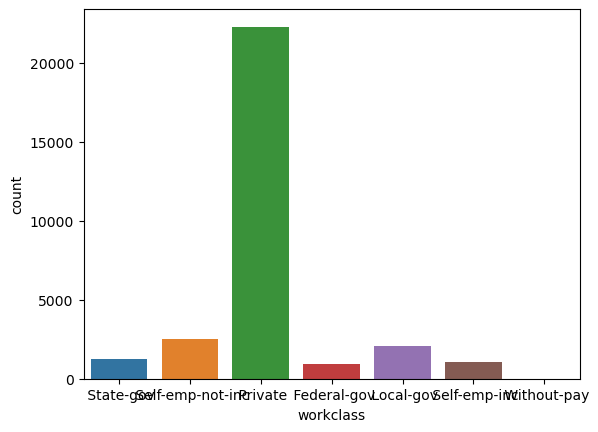

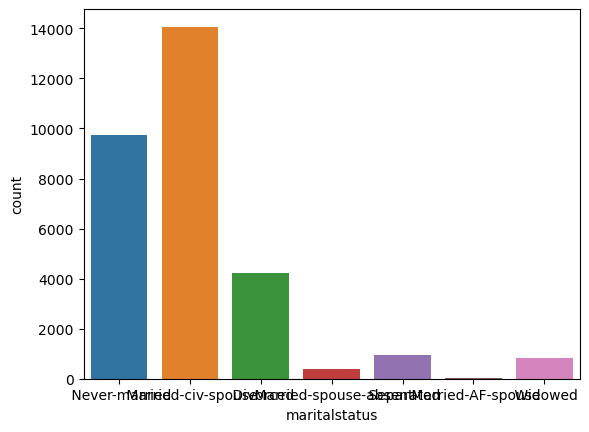

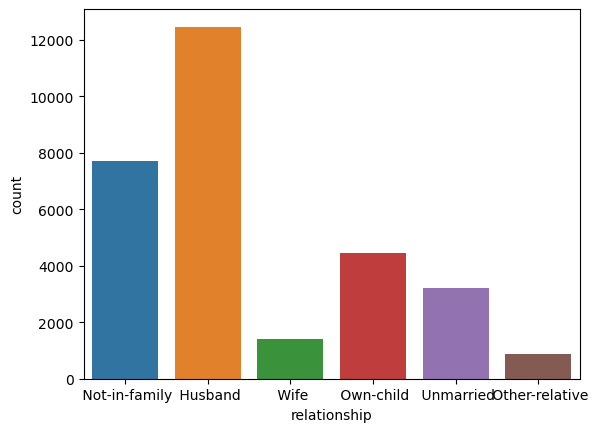

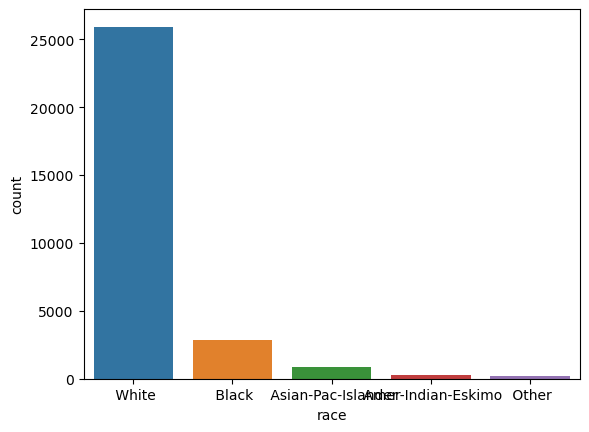

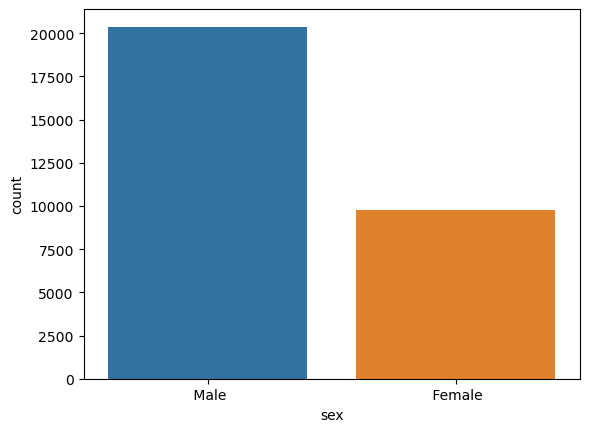

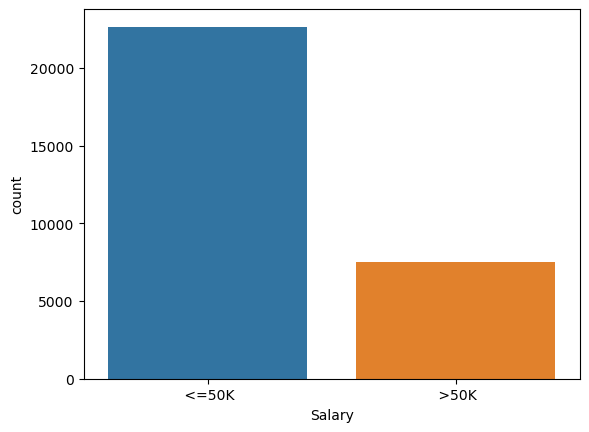

In [9]:
# Create count plots for train_data
#create count plots to visualize the distribution of categories in various columns 
sns.countplot(train_data['workclass'])
plt.show()
sns.countplot(train_data['maritalstatus'])
plt.show()
sns.countplot(train_data['relationship'])
plt.show()
sns.countplot(train_data['race'])
plt.show()
sns.countplot(train_data['sex'])
plt.show()
sns.countplot(train_data['Salary'])
plt.show()


In [10]:
 #applying the LabelEncoder to convert it from binary categorical values ('yes' or 'no') to numeric values.

LE = LabelEncoder()
for i in train_data.iloc[:,1:3]:
    train_data[i] = LE.fit_transform(train_data[i])
for i in train_data.iloc[:,4:9]:
    train_data[i] = LE.fit_transform(train_data[i])
for i in train_data.iloc[:,12:]:
    train_data[i] = LE.fit_transform(train_data[i])

In [11]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


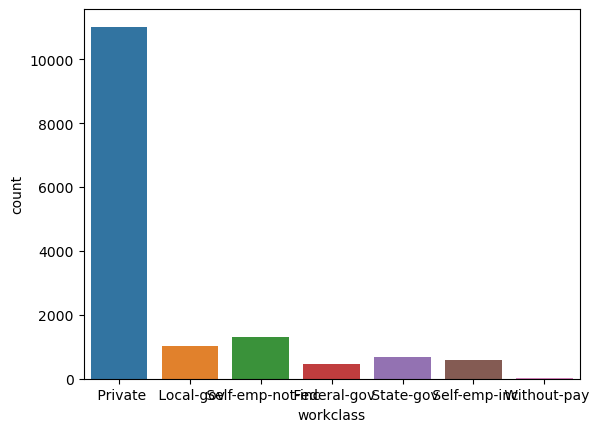

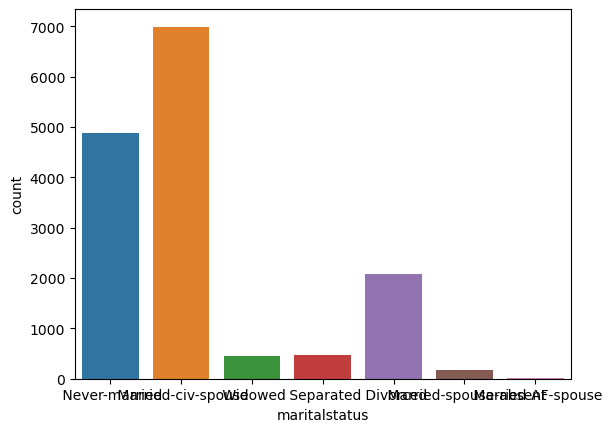

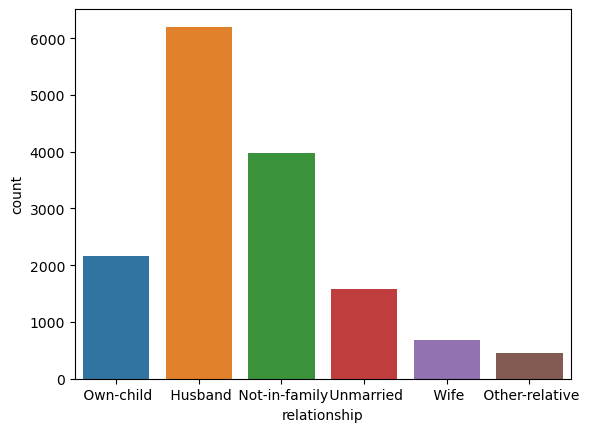

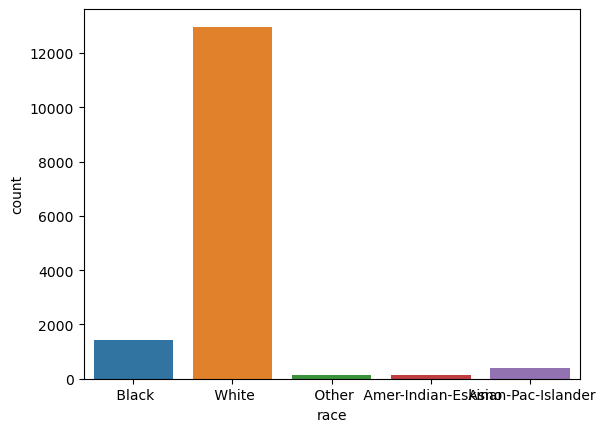

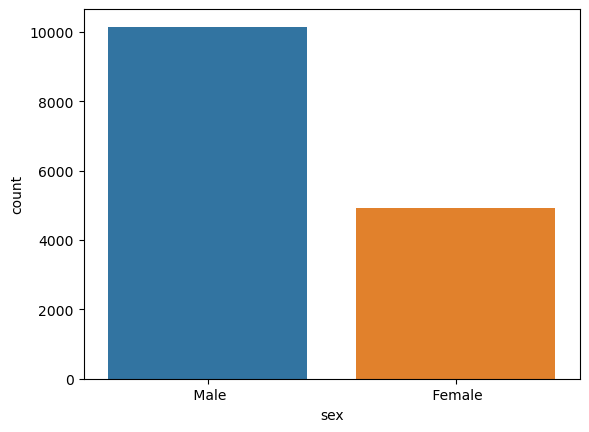

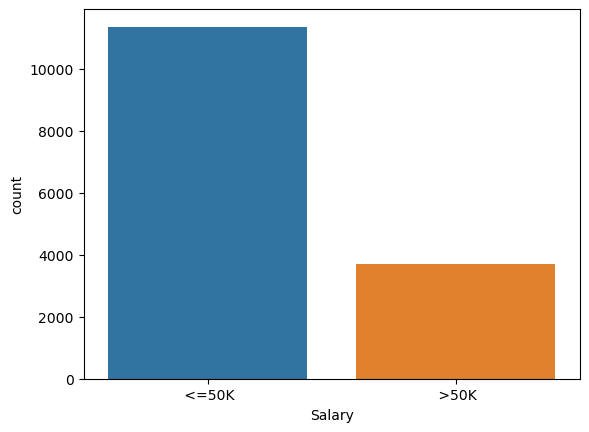

In [12]:
# Create count plots for test_data
#create count plots to visualize the distribution of categories in various columns 
sns.countplot(test_data['workclass'])
plt.show()
sns.countplot(test_data['maritalstatus'])
plt.show()
sns.countplot(test_data['relationship'])
plt.show()
sns.countplot(test_data['race'])
plt.show()
sns.countplot(test_data['sex'])
plt.show()
sns.countplot(test_data['Salary'])
plt.show()

In [13]:
 #applying the LabelEncoder to convert it from binary categorical values ('yes' or 'no') to numeric values.
LE = LabelEncoder()
for i in test_data.iloc[:,1:3]:
    test_data[i] = LE.fit_transform(test_data[i])
for i in test_data.iloc[:,4:9]:
    test_data[i] = LE.fit_transform(test_data[i])
for i in test_data.iloc[:,12:]:
    test_data[i] = LE.fit_transform(test_data[i])

In [14]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [15]:
#splitting your dataset into training and testing sets
X_train = train_data.drop('Salary',axis=1)
X_test = test_data.drop('Salary',axis=1)
Y_train = train_data['Salary']
Y_test = test_data['Salary']
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((30161, 13), (15060, 13), (30161,), (15060,))

In [16]:
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,4,6,3,2,1,0,0,40,37
1,38,2,11,9,2,4,0,4,1,0,0,50,37
2,28,1,7,12,2,10,0,4,1,0,0,40,37
3,44,2,15,10,2,6,0,2,1,7688,0,40,37
4,34,2,0,6,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37
15056,39,2,9,13,0,9,1,4,0,0,0,36,37
15057,38,2,9,13,2,9,0,4,1,0,0,50,37
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37


In [17]:
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [18]:
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37
30157,40,2,11,9,2,6,0,4,1,0,0,40,37
30158,58,2,11,9,6,0,4,4,0,0,0,40,37
30159,22,2,11,9,4,0,3,4,1,0,0,20,37


In [19]:
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30156    0
30157    1
30158    0
30159    0
30160    1
Name: Salary, Length: 30161, dtype: int32

In [20]:
#creating an instance of a Support Vector Classifier (SVC) mode
svc = SVC()

In [21]:
# fitting (SVC) model to your training data.
svc.fit(X_train,Y_train)

SVC()

In [22]:
#used (SVC) model to make predictions on both the training and test datasets.
Y_pred_train = svc.predict(X_train)
Y_pred_test =svc.predict(X_test)

In [23]:
#calculating and printing various performance metrics for your (SVC) model on both the training and test datasets
print("Accuracy score for train data : ",accuracy_score(Y_train,Y_pred_train))
print("Accuracy score for test data : ",accuracy_score(Y_test,Y_pred_test))
print("Confusion matrix for train data : ", confusion_matrix(Y_train,Y_pred_train))
print("Confusion matrix for test data : ",confusion_matrix(Y_test,Y_pred_test))

Accuracy score for train data :  0.7960279831570571
Accuracy score for test data :  0.7964143426294821
Confusion matrix for train data :  [[21950   703]
 [ 5449  2059]]
Confusion matrix for test data :  [[10997   363]
 [ 2703   997]]


In [24]:
#defining a set of hyperparameters and their corresponding values for tuning your Support Vector Classifier (SVC) model
params = [{'kernel':['linear'],'gamma':[50,10,5,1,0.5,0.1],'C':[15,14,12,10,5,1,0.5,0.1]}]

In [ ]:
svc = SVC()

In [ ]:
# creating (GSC) for hyperparameter tuning 
GSC = GridSearchCV(svc,params,cv=10)

In [ ]:
#GSC will go through different combinations of hyperparameters, train and evaluate the model for each combination
GSC.fit(X_train,Y_train)

In [ ]:
#retrieve the best set of hyperparameters
GSC.best_params_

In [ ]:
#retrieve the best cross-validated score
GSC.best_score_

In [ ]:
#create a (SVM) classifier with a linear kernel and gamma parameters
svc = SVC(kernel = 'linear',gamma = 50,C=15)

In [ ]:
# fitting (SVC) model to your training data.
svc.fit(X_train,Y_train)

In [ ]:
#used (SVC) model to make predictions on both the training and test datasets.
Y_pred_train = svc.predict(X_train)
Y_pred_test = svc.predict(X_test)

In [ ]:
#calculating and printing various performance metrics for your Support Vector Classifier (SVC) model on both the training and test datasets
print("Accuracy score for train data : ",accuracy_score(Y_train,Y_pred_train))
print("Accuracy score for test data : ",accuracy_score(Y_test,Y_pred_test))
print("Confusion matrix for train data : ",confusion_matrix(Y_train,Y_pred_train))
print("Confusion matrix for test data : ",confusion_matrix(Y_test,Y_pred_test))

In [ ]:
#The goal succeeded to accurately classify individuals into different salary categories based on their characteristics.
#success of the model depends on proper data preprocessing, feature engineering, hyperparameter tuning, and the choice of evaluation metrics